In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [16]:
df = pd.read_csv('/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/multimodal_biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace1.csv')


In [17]:
df.columns

Index(['analysis_type', 'session_id', 'throughput_ksps', 'timestamp_iso',
       'execution_time_ms', 'peak_memory_mb', 'file_name', 'timestamp',
       'plot_gen_time_ms', 'total_points_rendered', 'active_trace_count'],
      dtype='object')

In [18]:
df.head()

,analysis_type,session_id,throughput_ksps,timestamp_iso,execution_time_ms,peak_memory_mb,file_name,timestamp,plot_gen_time_ms,total_points_rendered,active_trace_count
0,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,9464.754724,2025-12-22 8:37:35,68.675842,0,119_12,2025-12-22 08:37:34.959000+00:00,26.16,650000,1
1,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15572.438900,2025-12-22 8:37:36,41.740411,0,119_12,2025-12-22 08:37:36.521000+00:00,7.46,650000,1
2,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15051.401230,2025-12-22 8:37:38,43.185348,0,119_12,2025-12-22 08:37:38.101000+00:00,6.11,650000,1
3,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,16365.783830,2025-12-22 8:37:39,39.717010,0,119_12,2025-12-22 08:37:39.645000+00:00,4.08,650000,1
4,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15717.638860,2025-12-22 8:37:41,41.354812,0,119_12,2025-12-22 08:37:41.324000+00:00,5.21,650000,1


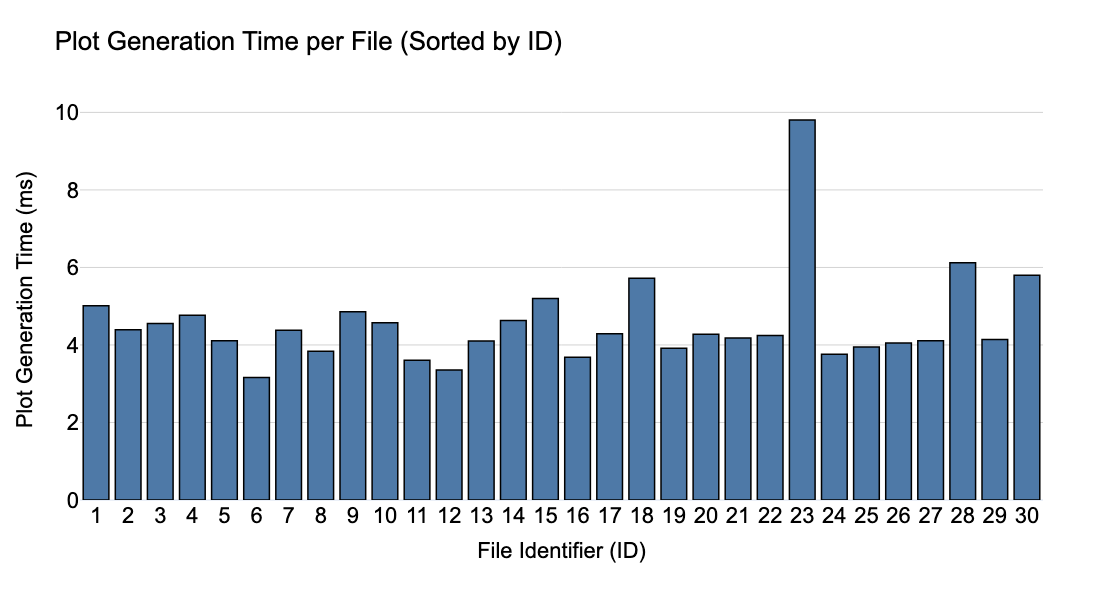

In [19]:
import pandas as pd
import plotly.express as px


# 2. Create a unique numerical mapping for each file
unique_files = sorted(df['file_name'].unique())
file_to_id = {name: i + 1 for i, name in enumerate(unique_files)}
df['file_id'] = df['file_name'].map(file_to_id)

# 3. Aggregate data to get the mean of the 5 samples per file
df_agg = df.groupby(['file_id', 'file_name'])['plot_gen_time_ms'].mean().reset_index()

# 4. Sort by file_id in ascending order (1, 2, 3...)
df_agg = df_agg.sort_values(by='file_id', ascending=True)

# Convert ID to string to ensure discrete categorical labeling
df_agg['file_id'] = df_agg['file_id'].astype(str)

# 5. Create the Plotly Bar Chart
fig = px.bar(
    df_agg,
    x='file_id',
    y='plot_gen_time_ms',
    title='Plot Generation Time per File (Sorted by ID)',
    labels={'file_id': 'Unique File ID', 'plot_gen_time_ms': 'Plot Generation Time (ms)'},
    template='plotly_white'
)

# 6. Apply Research Paper Formatting with Increased Font Sizes
fig.update_traces(
    marker_color='#4E79A7',    # Uniform professional blue
    marker_line_color='black', # Defined borders
    marker_line_width=1.5,
    customdata=df_agg['file_name'],
    hovertemplate="<b>File ID: %{x}</b><br>Original Name: %{customdata}<br>Avg Time: %{y:.2f} ms<extra></extra>"
)

fig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_size=26,         # Main Title Size
    xaxis=dict(
        title="File Identifier (ID)",
        title_font_size=22,     # Increased X-axis label size
        tickfont_size=22,       # Increased X-axis tick size
        tickangle=0,
        showgrid=False,
        type='category'
    ),
    yaxis=dict(
        title="Plot Generation Time (ms)",
        title_font_size=22,     # Increased Y-axis label size
        tickfont_size=22,       # Increased Y-axis tick size
        showgrid=True,
        gridcolor='LightGray'
    ),
    width=1000,
    height=600,
    margin=dict(l=80, r=50, t=100, b=100)
)

fig.show()

In [20]:
df

,analysis_type,session_id,throughput_ksps,timestamp_iso,execution_time_ms,peak_memory_mb,file_name,timestamp,plot_gen_time_ms,total_points_rendered,active_trace_count,file_id
0,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,9464.754724,2025-12-22 8:37:35,68.675842,0,119_12,2025-12-22 08:37:34.959000+00:00,26.16,650000,1,23
1,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15572.438900,2025-12-22 8:37:36,41.740411,0,119_12,2025-12-22 08:37:36.521000+00:00,7.46,650000,1,23
2,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15051.401230,2025-12-22 8:37:38,43.185348,0,119_12,2025-12-22 08:37:38.101000+00:00,6.11,650000,1,23
3,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,16365.783830,2025-12-22 8:37:39,39.717010,0,119_12,2025-12-22 08:37:39.645000+00:00,4.08,650000,1,23
4,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15717.638860,2025-12-22 8:37:41,41.354812,0,119_12,2025-12-22 08:37:41.324000+00:00,5.21,650000,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
145,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,18555.961380,2025-12-22 8:40:08,35.029174,0,119e_6,2025-12-22 08:40:08.369000+00:00,3.51,650000,1,24
146,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,17404.025700,2025-12-22 8:40:09,37.347681,0,119e_6,2025-12-22 08:40:09.083000+00:00,3.74,650000,1,24
147,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,15918.006500,2025-12-22 8:40:09,40.834259,0,119e_6,2025-12-22 08:40:09.860000+00:00,5.34,650000,1,24
148,eval_benchmark,EVAL_BATCH_tmpflm3pku7_20251222_083732_e524,18050.345020,2025-12-22 8:40:10,36.010392,0,119e_6,2025-12-22 08:40:10.723000+00:00,3.28,650000,1,24


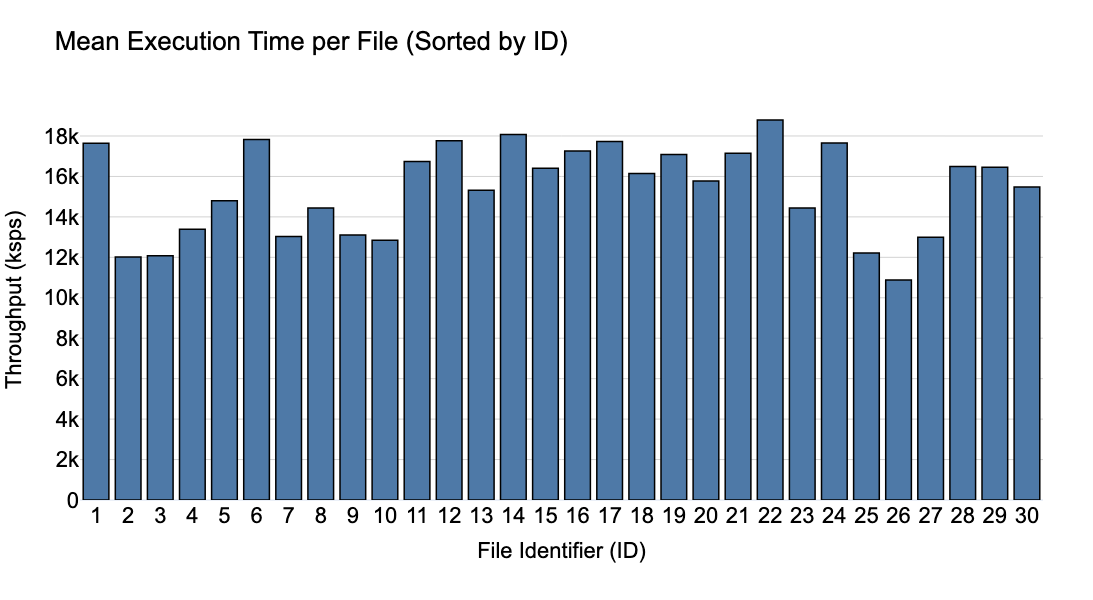

In [21]:



# 2. Create a unique numerical mapping for each file
unique_files = sorted(df['file_name'].unique())
file_to_id = {name: i + 1 for i, name in enumerate(unique_files)}
df['file_id'] = df['file_name'].map(file_to_id)

# 3. Aggregate data to get the mean of the 5 samples per file
df_agg = df.groupby(['file_id', 'file_name'])['throughput_ksps'].mean().reset_index()

# 4. Sort by file_id in ascending order (1, 2, 3...)
df_agg = df_agg.sort_values(by='file_id', ascending=True)

# Convert ID to string to ensure discrete categorical labeling
df_agg['file_id'] = df_agg['file_id'].astype(str)

# 5. Create the Plotly Bar Chart
fig = px.bar(
    df_agg,
    x='file_id',
    y='throughput_ksps',
    title='Throughput per File (Sorted by ID)',
    labels={'file_id': 'Unique File ID', 'throughput_ksps': 'Throughput (ksps)'},
    template='plotly_white'
)

# 6. Apply Research Paper Formatting with Increased Font Sizes
fig.update_traces(
    marker_color='#4E79A7',    # Uniform professional blue
    marker_line_color='black', # Defined borders
    marker_line_width=1.5,
    customdata=df_agg['file_name'],
    hovertemplate="<b>File ID: %{x}</b><br>Original Name: %{customdata}<br>Avg Time: %{y:.2f} ms<extra></extra>"
)

fig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_size=26,         # Main Title Size
    xaxis=dict(
        title="File Identifier (ID)",
        title_font_size=22,     # Increased X-axis label size
        tickfont_size=22,       # Increased X-axis tick size
        tickangle=0,
        showgrid=False,
        type='category'
    ),
    yaxis=dict(
        title="Throughput (ksps)",
        title_font_size=22,     # Increased Y-axis label size
        tickfont_size=22,       # Increased Y-axis tick size
        showgrid=True,
        gridcolor='LightGray'
    ),
    width=1000,
    height=600,
    margin=dict(l=80, r=50, t=100, b=100)
)

fig.show()

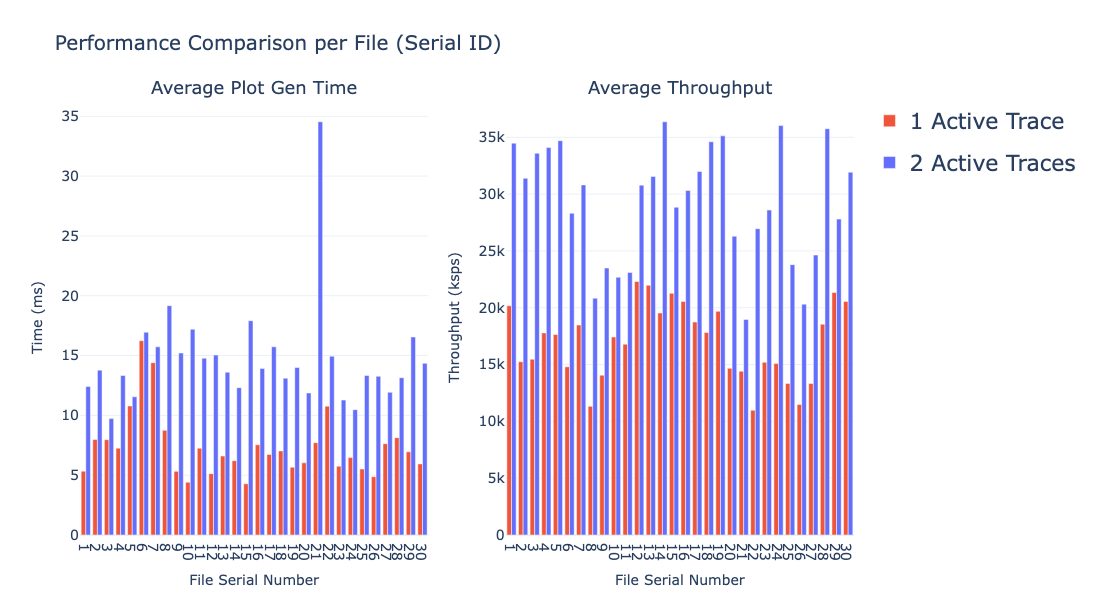

In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Load the datasets
# file_trace1 = '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/multimodal_biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace1.csv'
# file_trace2 = '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/multimodal_biosignalviz/eval_data/MITBIH_Stress_Noise_Trace2.csv'
######################################################
file_trace1 = '/Volumes/ss/biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace2_LocalDesktop/MIT_BIH_Stress_Trace1_LocalDesktop.csv'
file_trace2 = '/Volumes/ss/biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace2_LocalDesktop/MIT_BIH_Stress_Trace2_LocalDesktop.csv'

try:
    df1 = pd.read_csv(file_trace1)
    df2 = pd.read_csv(file_trace2)
except FileNotFoundError:
    print("Error: CSV files not found. Please check the file paths.")
    exit()

# 2. Combine the data
df_combined = pd.concat([df1, df2], ignore_index=True)

# 3. Create Serial Numbers for Files
# Get unique file names, sort them, and assign a number (1, 2, 3...)
unique_files = sorted(df_combined['file_name'].unique())
file_map = {name: i+1 for i, name in enumerate(unique_files)}

# Map the serial numbers to the dataframe
df_combined['serial_number'] = df_combined['file_name'].map(file_map)

# 4. Aggregate: Average of the runs per Serial Number and Trace Count
df_agg = df_combined.groupby(['serial_number', 'active_trace_count'])[['plot_gen_time_ms', 'throughput_ksps']].mean().reset_index()

# Separate the data for plotting
trace1_data = df_agg[df_agg['active_trace_count'] == 1].sort_values('serial_number')
trace2_data = df_agg[df_agg['active_trace_count'] == 2].sort_values('serial_number')

# 5. Create Subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Average Plot Gen Time", "Average Throughput"),
    horizontal_spacing=0.1
)

# --- Subplot 1: Plot Gen Time ---
fig.add_trace(
    go.Bar(
        x=trace1_data['serial_number'],
        y=trace1_data['plot_gen_time_ms'],
        name='1 Active Trace',
        legendgroup='1',
        marker_color='#EF553B'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=trace2_data['serial_number'],
        y=trace2_data['plot_gen_time_ms'],
        name='2 Active Traces',
        legendgroup='2',
        marker_color='#636EFA'
    ),
    row=1, col=1
)

# --- Subplot 2: Throughput ---
fig.add_trace(
    go.Bar(
        x=trace1_data['serial_number'],
        y=trace1_data['throughput_ksps'],
        name='1 Active Trace',
        legendgroup='1',
        showlegend=False,
        marker_color='#EF553B'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=trace2_data['serial_number'],
        y=trace2_data['throughput_ksps'],
        name='2 Active Traces',
        legendgroup='2',
        showlegend=False,
        marker_color='#636EFA'
    ),
    row=1, col=2
)

# 6. Update Layout & Font Sizes
# You can change the 'size' values below to adjust readability
font_size_axis = 14
font_size_title = 18
font_size_legend = 22

fig.update_layout(
    title_text="Performance Comparison per File (Serial ID)",
    title_font_size=20,
    barmode='group',
    height=600,
    width=1400,
    template="plotly_white",
    legend=dict(
        font=dict(size=font_size_legend)
    )
)

# Apply font sizes to X and Y axes
fig.update_xaxes(
    title_text="File Serial Number", 
    tickmode='linear',  # Ensures every number (1, 2, 3...) is shown
    title_font=dict(size=font_size_axis),
    tickfont=dict(size=font_size_axis),
    row=1, col=1
)
fig.update_yaxes(
    title_text="Time (ms)", 
    title_font=dict(size=font_size_axis),
    tickfont=dict(size=font_size_axis),
    row=1, col=1
)

fig.update_xaxes(
    title_text="File Serial Number", 
    tickmode='linear',
    title_font=dict(size=font_size_axis),
    tickfont=dict(size=font_size_axis),
    row=1, col=2
)
fig.update_yaxes(
    title_text="Throughput (ksps)", 
    title_font=dict(size=font_size_axis),
    tickfont=dict(size=font_size_axis),
    row=1, col=2
)

# Update Subplot Titles Font
fig.update_annotations(font_size=font_size_title)

fig.show()

## MIT BIH Stress Noise Local vs Container

------------------------------------------------------------
Environment          | Trace Load | Metric          | Mean       | Std Dev   
------------------------------------------------------------
Docker Container     | 1 Trace    | Latency (ms)    |      43.57 |       8.14
                     |            | T-put (ksps)    |   15400.22 |    2664.27
------------------------------------------------------------
Docker Container     | 2 Traces   | Latency (ms)    |      43.88 |      11.74
                     |            | T-put (ksps)    |   30886.40 |    5641.29
------------------------------------------------------------
Local (Mac Pro)      | 1 Trace    | Latency (ms)    |      41.38 |      14.31
                     |            | T-put (ksps)    |   17000.98 |    4365.97
------------------------------------------------------------
Local (Mac Pro)      | 2 Traces   | Latency (ms)    |      47.33 |      14.39
                     |            | T-put (ksps)    |   29272.61 |    6

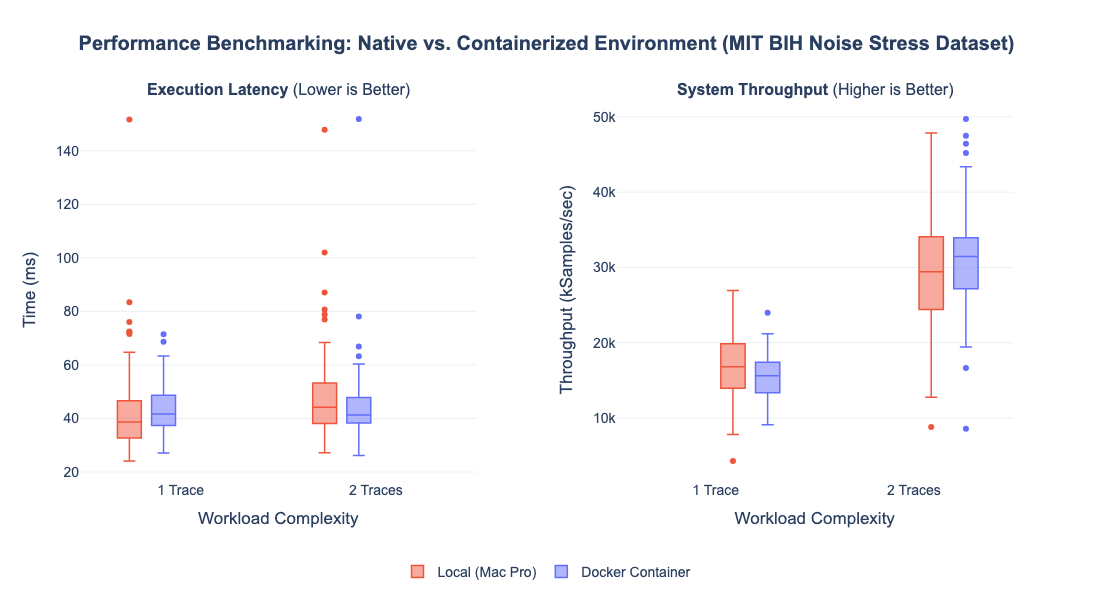

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------------------------------------------------------
# 🎨 COLOR CONFIGURATION
# ---------------------------------------------------------
COLOR_LOCAL = '#EF553B'      # Red/Orange
COLOR_DOCKER = '#636EFA'     # Blue/Purple

# ---------------------------------------------------------
# 1. Load the Datasets
# ---------------------------------------------------------
files = {
    "Local_1": "/Volumes/ss/biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace2_LocalDesktop/MIT_BIH_Stress_Trace1_LocalDesktop.csv",
    "Local_2": "/Volumes/ss/biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace2_LocalDesktop/MIT_BIH_Stress_Trace2_LocalDesktop.csv",
    "Docker_1": "/Volumes/ss/biosignalviz/eval_data/MIT_BIH_Stress_Noise_Trace1.csv",
    "Docker_2": "/Volumes/ss/biosignalviz/eval_data/MITBIH_Stress_Noise_Trace2.csv"
}

try:
    df_local_1 = pd.read_csv(files["Local_1"])
    df_local_2 = pd.read_csv(files["Local_2"])
    df_docker_1 = pd.read_csv(files["Docker_1"])
    df_docker_2 = pd.read_csv(files["Docker_2"])
except FileNotFoundError as e:
    print(f"Error: {e}. Please check your file paths.")

# ---------------------------------------------------------
# 2. Preprocess & Merge
# ---------------------------------------------------------
df_local_1['Environment'] = 'Local (Mac Pro)'
df_local_1['Traces'] = '1 Trace'
df_local_2['Environment'] = 'Local (Mac Pro)'
df_local_2['Traces'] = '2 Traces'

df_docker_1['Environment'] = 'Docker Container'
df_docker_1['Traces'] = '1 Trace'
df_docker_2['Environment'] = 'Docker Container'
df_docker_2['Traces'] = '2 Traces'

df_all = pd.concat([df_local_1, df_local_2, df_docker_1, df_docker_2], ignore_index=True)

# ---------------------------------------------------------
# 3. Calculate & Print Statistics (Mean +/- STD)
# ---------------------------------------------------------
print("-" * 60)
print(f"{'Environment':<20} | {'Trace Load':<10} | {'Metric':<15} | {'Mean':<10} | {'Std Dev':<10}")
print("-" * 60)

stats = df_all.groupby(['Environment', 'Traces'])[['execution_time_ms', 'throughput_ksps']].agg(['mean', 'std'])

for (env, trace), row in stats.iterrows():
    # Execution Time Stats
    exec_mean = row[('execution_time_ms', 'mean')]
    exec_std = row[('execution_time_ms', 'std')]
    print(f"{env:<20} | {trace:<10} | {'Latency (ms)':<15} | {exec_mean:10.2f} | {exec_std:10.2f}")
    
    # Throughput Stats
    tput_mean = row[('throughput_ksps', 'mean')]
    tput_std = row[('throughput_ksps', 'std')]
    print(f"{'':<20} | {'':<10} | {'T-put (ksps)':<15} | {tput_mean:10.2f} | {tput_std:10.2f}")
    print("-" * 60)

# ---------------------------------------------------------
# 4. Create Plots
# ---------------------------------------------------------
colors = {'Local (Mac Pro)': COLOR_LOCAL, 'Docker Container': COLOR_DOCKER}

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Execution Latency</b> (Lower is Better)", 
                    "<b>System Throughput</b> (Higher is Better)"),
    horizontal_spacing=0.15
)

# Plot 1: Execution Time
for env in df_all['Environment'].unique():
    subset = df_all[df_all['Environment'] == env]
    fig.add_trace(
        go.Box(
            x=subset['Traces'],
            y=subset['execution_time_ms'],
            name=env,
            legendgroup=env,
            marker_color=colors[env],
            boxpoints='outliers',
            line_width=1.5
        ),
        row=1, col=1
    )

# Plot 2: Throughput
for env in df_all['Environment'].unique():
    subset = df_all[df_all['Environment'] == env]
    fig.add_trace(
        go.Box(
            x=subset['Traces'],
            y=subset['throughput_ksps'],
            name=env,
            legendgroup=env,
            showlegend=False,
            marker_color=colors[env],
            boxpoints='outliers',
            line_width=1.5
        ),
        row=1, col=2
    )

# ---------------------------------------------------------
# 5. Update Layout (Bottom Legend)
# ---------------------------------------------------------
fig.update_layout(
    title_text="<b>Performance Benchmarking: Native vs. Containerized Environment (MIT BIH Noise Stress Dataset)</b>",
    title_x=0.5,
    boxmode='group',
    height=600,
    width=1000,
    template="plotly_white",
    
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    
    font=dict(family="Arial, sans-serif", size=14),
    margin=dict(b=100)
)

fig.update_yaxes(title_text="Time (ms)", row=1, col=1)
fig.update_yaxes(title_text="Throughput (kSamples/sec)", row=1, col=2)
fig.update_xaxes(title_text="Workload Complexity", row=1, col=1)
fig.update_xaxes(title_text="Workload Complexity", row=1, col=2)

fig.show()

## MindGame Dataset

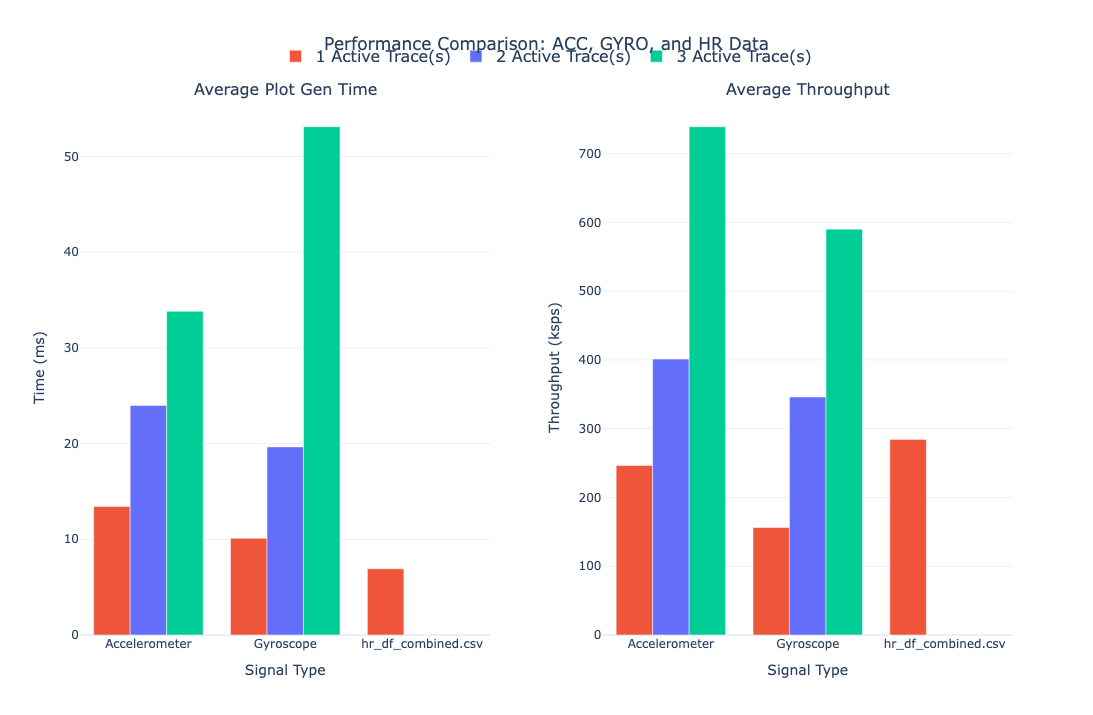

In [2]:

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Load the datasets
# Add your Heart Rate trace files to this list (e.g., 'MindGame_HR_Trace_1.csv', etc.)
file_paths = [
    '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/biosignalviz_others/eval_data/MindGame/MindGame_ACC_GYRO_Trace_1.csv',
    '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/biosignalviz_others/eval_data/MindGame/MindGame_ACC_GYRO_Trace_2.csv',
    '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/biosignalviz_others/eval_data/MindGame/MindGame_ACC_GYRO_Trace_3.csv',
    '/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_MINDER/biosignalviz_others/eval_data/MindGame/MindGame_HR_Trace_1.csv'
    
    # Add Heart Rate files here if they are in separate CSVs
]

dfs = []
for f in file_paths:
    try:
        dfs.append(pd.read_csv(f))
    except FileNotFoundError:
        print(f"Error: {f} not found.")

if not dfs:
    print("No data loaded. Please check file paths.")
    exit()

# 2. Combine and Clean the data
df_combined = pd.concat(dfs, ignore_index=True)

# Map the file_name to readable labels for the X-axis
# This automatically handles 'acc.csv', 'gyro.csv', and 'hr.csv' or others
name_mapping = {
    'acc.csv': 'Accelerometer',
    'gyro.csv': 'Gyroscope',
    'hr.csv': 'Heart Rate' # Assuming your heart rate file is named hr.csv
}
df_combined['signal_type'] = df_combined['file_name'].map(lambda x: name_mapping.get(x, x))

# 3. Aggregate: Average per Signal Type and Active Trace Count
df_agg = df_combined.groupby(['signal_type', 'active_trace_count'])[['plot_gen_time_ms', 'throughput_ksps']].mean().reset_index()

# 4. Create Subplots (1 Row, 2 Columns)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Average Plot Gen Time", "Average Throughput"),
    horizontal_spacing=0.12
)

# Color palette for 1, 2, and 3 active traces
colors = {1: '#EF553B', 2: '#636EFA', 3: '#00CC96'}
trace_counts = sorted(df_agg['active_trace_count'].unique())
signals = sorted(df_agg['signal_type'].unique())

for count in trace_counts:
    subset = df_agg[df_agg['active_trace_count'] == count]
    
    # --- Subplot 1: Plot Gen Time ---
    fig.add_trace(
        go.Bar(
            x=subset['signal_type'],
            y=subset['plot_gen_time_ms'],
            name=f'{count} Active Trace(s)',
            legendgroup=str(count),
            marker_color=colors.get(count, '#333'),
            offsetgroup=str(count)
        ),
        row=1, col=1
    )

    # --- Subplot 2: Throughput ---
    fig.add_trace(
        go.Bar(
            x=subset['signal_type'],
            y=subset['throughput_ksps'],
            name=f'{count} Active Trace(s)',
            legendgroup=str(count),
            showlegend=False,
            marker_color=colors.get(count, '#333'),
            offsetgroup=str(count)
        ),
        row=1, col=2
    )

# 5. Update Layout & Styling
font_size_axis = 14
font_size_title = 18
font_size_legend = 16

fig.update_layout(
    title_text="Performance Comparison: ACC, GYRO, and HR Data",
    title_x=0.5,
    barmode='group',
    height=700,
    width=1200,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5,
        font=dict(size=font_size_legend)
    )
)

# Axis formatting
fig.update_xaxes(title_text="Signal Type", title_font_size=font_size_axis)
fig.update_yaxes(title_text="Time (ms)", row=1, col=1)
fig.update_yaxes(title_text="Throughput (ksps)", row=1, col=2)

fig.show(height = 500,width=900)